In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

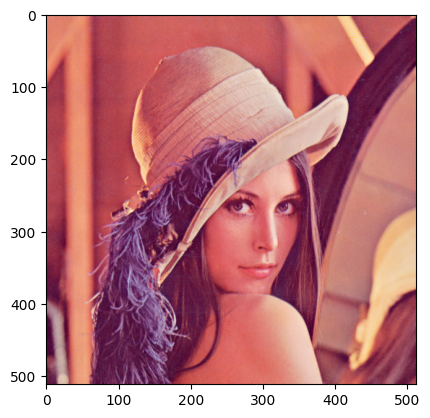

In [2]:
img = cv2.imread('lenna.png', cv2.IMREAD_COLOR)
h, w, c = img.shape
img_b, img_g, img_r = cv2.split(img)
plt.imshow(cv2.merge([img_r, img_g, img_b]))
plt.show()

In [3]:
img_b = img_b.ravel()
img_g = img_g.ravel()
img_r = img_r.ravel()

In [4]:
with open('in_img_b.txt', 'w') as f:
    f.write('\n'.join(hex(pdata).replace('0x', '') for pdata in img_b))
    f.close()

with open('in_img_g.txt', 'w') as f:
    f.write('\n'.join(hex(pdata).replace('0x', '') for pdata in img_g))
    f.close()

with open('in_img_r.txt', 'w') as f:
    f.write('\n'.join(hex(pdata).replace('0x', '') for pdata in img_r))
    f.close()

In [5]:
ref_y = (img_r.astype(np.uint16)*77 + img_g.astype(np.uint16)*150 + img_b.astype(np.uint16)*29)//256
ref_y = ref_y.astype(np.uint8)

In [6]:
with open('out_y.txt', 'r') as f:
    img_y = [int(pdata) for pdata in f]
    f.close()

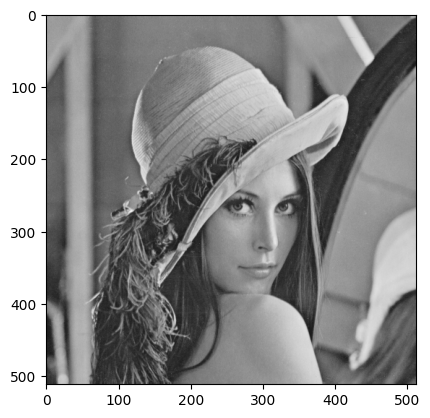

In [7]:
img_y = np.asarray(img_y, dtype=np.uint8)
diff = ref_y-img_y
img_y = img_y.reshape(h, w)
plt.imshow(img_y, cmap='gray', vmin=0, vmax=255)
plt.show()

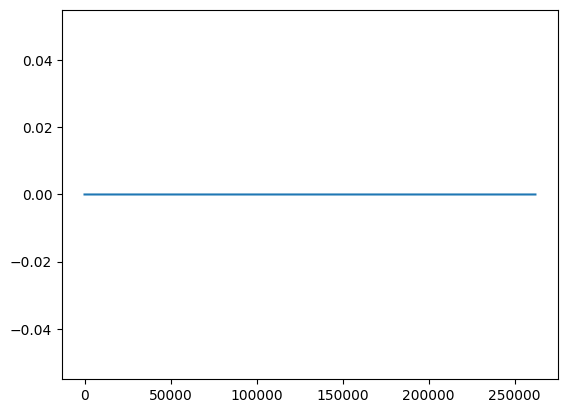

In [8]:
plt.plot(diff)
plt.show()